In [3]:
# August 8 2017
# This file is for experiments with student2 5 skills and training trajectory length 6,7,8
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def ixs2ranks(ixs):
    ranks = np.zeros(ixs.shape,dtype=np.int)
    for r,i in enumerate(ixs):
        ranks[i] = r
    return ranks

def graph_trainauc_score(vloss, scores, postfix=None):
    figure()
    if postfix is not None:
        xs = np.sum(vloss[:,-postfix:],axis=1)
    else:
        xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

def graph_msloss_score(msloss, scores):
    figure()
    xs = msloss
    ys = scores
    title('Multistep Loss versus Actual Performance')
    xlabel('Multistep Loss')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Training Trajectory 7 No Noise Learning Rate 0.0005 Stability

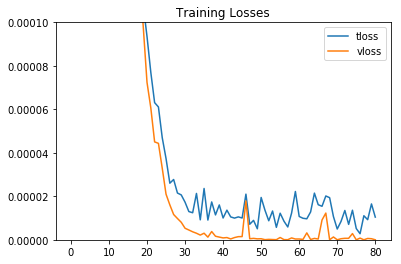

In [5]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like 30-40 is enough, so settle on 40

# Training Trajectory 6 No Noise Learning Rate 0.0005 Stability

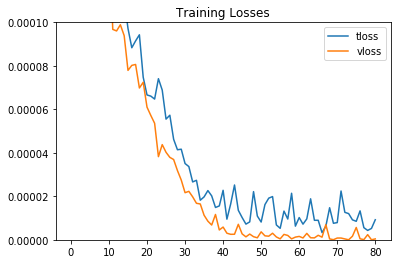

In [6]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like 50 is enough

# Training Trajectory 6 LR 0.0005 No Noise

vloss shape (50, 51)
scores shape (50,)
[ 0.     0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     1.     0.25
  1.     0.     0.     0.     0.     0.     0.375  0.     0.     0.125  0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.25   0.   ]


(-0.1, 1.1)

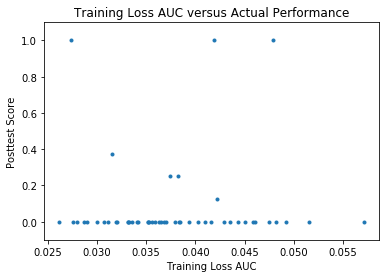

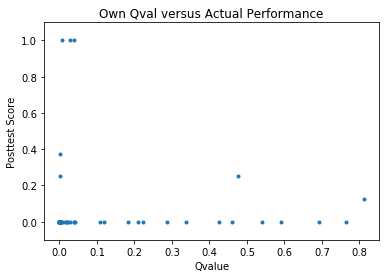

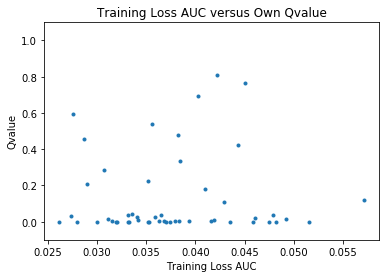

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr0005B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr0005B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr0005B.npz')

vloss = np.vstack((data11['vloss'],))
vloss_auc = np.sum(vloss,axis=1)
vloss_last = np.mean(vloss[:,-2:],axis=1)

tloss = np.vstack((data11['tloss'],))
tloss_auc = np.sum(tloss,axis=1)
tloss_last = np.mean(tloss[:,-2:],axis=1)

scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

In [5]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

31 | score 0.1  6th | vloss auc 0.04219 37th | selfqval 0.8115  0th
40 | score 0.0 36th | vloss auc 0.04506 41th | selfqval 0.7653  1th
29 | score 0.0 46th | vloss auc 0.04027 33th | selfqval 0.6918  2th
42 | score 0.0 34th | vloss auc 0.02753  2th | selfqval 0.5917  3th
41 | score 0.0 35th | vloss auc 0.03562 21th | selfqval 0.5409  4th
21 | score 0.2  5th | vloss auc 0.03818 29th | selfqval 0.4772  5th
10 | score 0.0 16th | vloss auc 0.02863  4th | selfqval 0.4588  6th
37 | score 0.0 38th | vloss auc 0.04433 40th | selfqval 0.4242  7th
19 | score 0.0  8th | vloss auc 0.03841 31th | selfqval 0.3376  8th
35 | score 0.0 41th | vloss auc 0.03066  7th | selfqval 0.2872  9th
33 | score 0.0 43th | vloss auc 0.03515 18th | selfqval 0.2228 10th
 2 | score 0.0 23th | vloss auc 0.02894  5th | selfqval 0.2090 11th
24 | score 0.0 26th | vloss auc 0.04093 34th | selfqval 0.1829 12th
 6 | score 0.0 19th | vloss auc 0.05711 49th | selfqval 0.1193 13th
13 | score 0.0  7th | vloss auc 0.04295 38th | s

# Training Trajectories Length 7 LR 0.0005 No Noise

vloss shape (50, 41)
scores shape (50,)
[ 1.     1.     1.     1.     0.     1.     1.     1.     1.     1.     0.
  1.     1.     1.     1.     0.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     0.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     0.     1.
  0.     0.     1.     0.     1.     0.375]


(-0.1, 1.1)

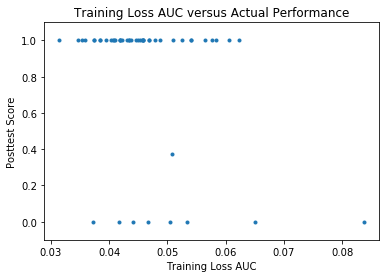

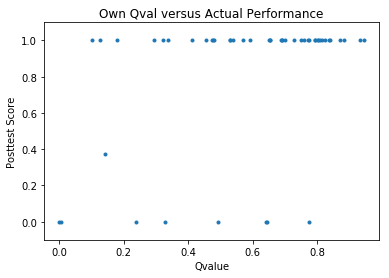

In [8]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr0005B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr0005B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr0005B.npz')

vloss = np.vstack((data11['vloss'],))
vloss_auc = np.sum(vloss,axis=1)
vloss_last = np.mean(vloss[:,-2:],axis=1)

tloss = np.vstack((data11['tloss'],))
tloss_auc = np.sum(tloss,axis=1)
tloss_last = np.mean(tloss[:,-2:],axis=1)

scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)
ylim(-0.1,1.1)
#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)

In [7]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

30 | score 1.0 38th | vloss auc 0.03541  2th | selfqval 0.9449  0th
24 | score 1.0  0th | vloss auc 0.03748  6th | selfqval 0.9341  1th
12 | score 1.0 11th | vloss auc 0.04685 32th | selfqval 0.8833  2th
34 | score 1.0 34th | vloss auc 0.04576 29th | selfqval 0.8697  3th
41 | score 1.0 28th | vloss auc 0.06233 47th | selfqval 0.8412  4th
13 | score 1.0  1th | vloss auc 0.05403 41th | selfqval 0.8375  5th
 2 | score 1.0 20th | vloss auc 0.04464 24th | selfqval 0.8244  6th
23 | score 1.0  2th | vloss auc 0.05828 45th | selfqval 0.8155  7th
 5 | score 1.0 18th | vloss auc 0.04571 27th | selfqval 0.8082  8th
38 | score 1.0 33th | vloss auc 0.05252 39th | selfqval 0.8032  9th
 6 | score 1.0 17th | vloss auc 0.04337 20th | selfqval 0.8023 10th
25 | score 1.0 12th | vloss auc 0.03592  3th | selfqval 0.7943 11th
17 | score 1.0  8th | vloss auc 0.05410 42th | selfqval 0.7923 12th
 8 | score 1.0 15th | vloss auc 0.04534 26th | selfqval 0.7755 13th
15 | score 0.0 42th | vloss auc 0.06502 48th | s

# Training Length 6 Noise 0.05 LR 0.0005 Stability

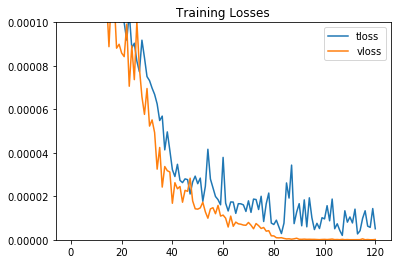

In [2]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like wants 100 is enough

# Training Length 7 Noise 0.05 LR 0.0005 Stability

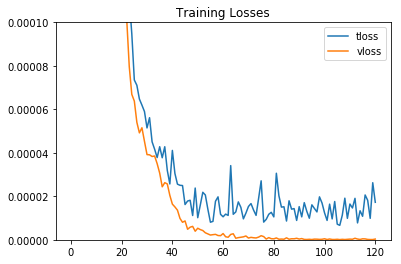

In [3]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like 90 is enough

# Length 7 Noise 0.05

vloss shape (50, 91)
scores shape (50,)
[ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     0.     1.     1.
  0.375  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.   ]


(-0.1, 1.1)

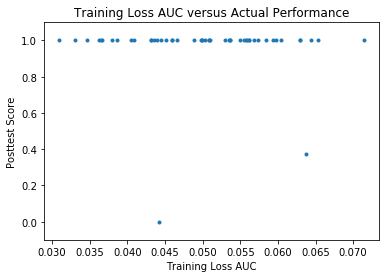

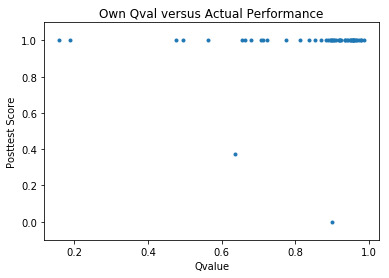

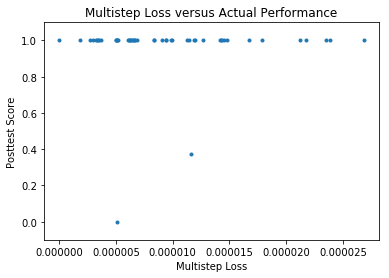

In [3]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr0005B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr0005B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr0005B.npz')
data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/msloss-runlr0005B.npz')

vloss = np.vstack((data11['vloss'],))
vloss_auc = np.sum(vloss,axis=1)
vloss_last = np.mean(vloss[:,-2:],axis=1)

tloss = np.vstack((data11['tloss'],))
tloss_auc = np.sum(tloss,axis=1)
tloss_last = np.mean(tloss[:,-2:],axis=1)

msloss = data41['msloss'][:,0,:]

scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_msloss = np.argsort(msloss)
ranked_by_msloss = ixs2ranks(sorted_by_msloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
# 48/50 good

graph_qval_score(selfqvals, scores)
ylim(-0.1,1.1)

graph_msloss_score(msloss, scores)
ylim(-0.1,1.1)

#graph_trainauc_(vloss,selfqvals)
#ylim(-0.1,1.1)

# Length 6 Noise 0.05

vloss shape (50, 101)
scores shape (50,)
msloss shape (50,)
[ 0.25   0.25   0.75   0.     0.     1.     0.     0.     0.875  0.     0.
  0.375  1.     0.25   0.     0.     1.     0.     0.     0.25   1.     0.625
  0.     0.     0.     0.     0.     0.     0.125  0.25   0.     0.     0.
  0.625  0.     0.     0.     0.     0.     0.625  0.     0.     1.     1.
  0.     0.     0.     0.125  0.     0.   ]


(-0.1, 1.1)

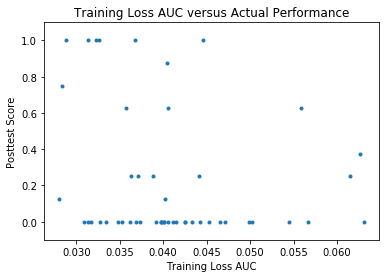

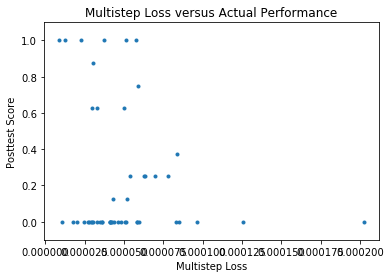

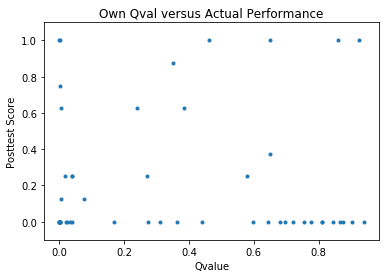

In [5]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr0005B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr0005B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr0005B.npz')
data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.05-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/msloss-runlr0005B.npz')

vloss = np.vstack((data11['vloss'],))
vloss_auc = np.sum(vloss,axis=1)
vloss_last = np.mean(vloss[:,-2:],axis=1)

tloss = np.vstack((data11['tloss'],))
tloss_auc = np.sum(tloss,axis=1)
tloss_last = np.mean(tloss[:,-2:],axis=1)

msloss = data41['msloss'][:,0,0]

scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_msloss = np.argsort(msloss)
ranked_by_msloss = ixs2ranks(sorted_by_msloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_('msloss shape {}'.format(msloss.shape))
six.print_(scores)

num_models = scores.shape[0]

graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
# 6/50 good

graph_msloss_score(msloss, scores)
ylim(-0.1,1.1)

graph_qval_score(selfqvals, scores)
ylim(-0.1,1.1)

#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)

In [6]:
for i in six.moves.range(num_models):
    ix = sorted_by_msloss[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))


42 | score 1.0  2th | vloss auc 0.02881  2th | selfqval 0.8591  5th
30 | score 0.0 44th | vloss auc 0.03728 19th | selfqval 0.8093  8th
20 | score 1.0  5th | vloss auc 0.03258  8th | selfqval 0.6495 14th
18 | score 0.0 27th | vloss auc 0.03974 23th | selfqval 0.4393 20th
15 | score 0.0 25th | vloss auc 0.03084  3th | selfqval 0.9396  0th
 5 | score 1.0  3th | vloss auc 0.03678 16th | selfqval 0.9255  1th
41 | score 0.0 35th | vloss auc 0.04051 29th | selfqval 0.0332 33th
49 | score 0.0 29th | vloss auc 0.04256 34th | selfqval 0.7553 10th
 4 | score 0.0 22th | vloss auc 0.04532 39th | selfqval 0.0229 34th
35 | score 0.0 40th | vloss auc 0.03990 24th | selfqval 0.0399 30th
34 | score 0.0 41th | vloss auc 0.06308 49th | selfqval 0.3091 24th
21 | score 0.6  8th | vloss auc 0.05584 45th | selfqval 0.2380 27th
14 | score 0.0 24th | vloss auc 0.04326 35th | selfqval 0.9037  2th
 8 | score 0.9  6th | vloss auc 0.04041 28th | selfqval 0.3502 23th
39 | score 0.6 10th | vloss auc 0.03573 13th | s

# Old dropout result

vloss shape (20, 41)
scores shape (20,)
[ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.     0.375
  0.     1.     0.     0.     0.     0.     1.     0.     0.   ]


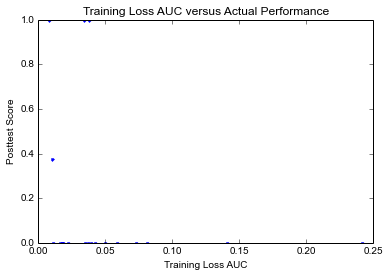

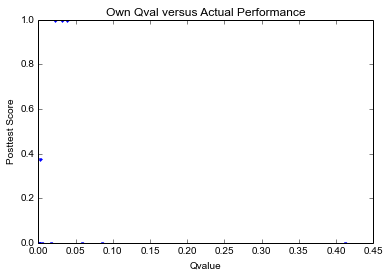

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Dropout 0.8
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

# Small Size Training Length 6

vloss shape (50, 51)
scores shape (50,)
[ 0.625  1.     0.     0.     0.     0.     0.125  0.     1.     0.     1.
  0.     0.     0.     0.     0.     0.     0.     0.     1.     0.5    0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.625  0.   ]


(-0.1, 1.1)

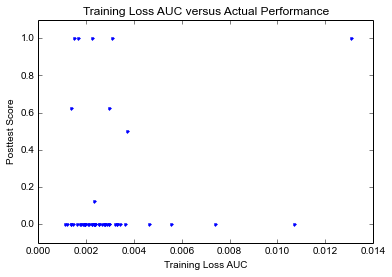

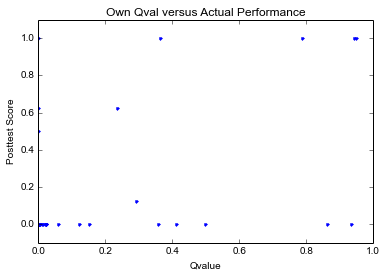

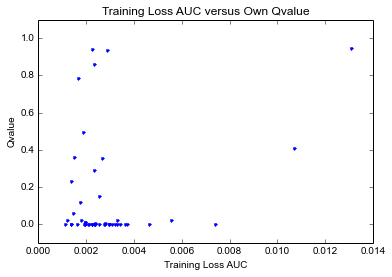

In [8]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')


vloss = data11['vloss']
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

# looks like 5/50 are good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)for i in six.moves.range(num_models):
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

In [10]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))
# sorting by self-reported qval seems like it may work

 1 | score 1.0  1th | vloss auc 0.01306 49th | selfqval 0.9485  0th
 8 | score 1.0  0th | vloss auc 0.00226 21th | selfqval 0.9433  1th
18 | score 0.0 14th | vloss auc 0.00286 34th | selfqval 0.9342  2th
39 | score 0.0 36th | vloss auc 0.00234 24th | selfqval 0.8614  3th
19 | score 1.0  2th | vloss auc 0.00167  8th | selfqval 0.7877  4th
15 | score 0.0 10th | vloss auc 0.00188 11th | selfqval 0.4969  5th
44 | score 0.0 31th | vloss auc 0.01068 48th | selfqval 0.4100  6th
45 | score 1.0  3th | vloss auc 0.00149  6th | selfqval 0.3622  7th
46 | score 0.0 30th | vloss auc 0.00267 30th | selfqval 0.3561  8th
 6 | score 0.1  8th | vloss auc 0.00233 22th | selfqval 0.2906  9th
48 | score 0.6  6th | vloss auc 0.00138  4th | selfqval 0.2349 10th
22 | score 0.0 11th | vloss auc 0.00253 29th | selfqval 0.1519 11th
35 | score 0.0 40th | vloss auc 0.00176  9th | selfqval 0.1212 12th
 4 | score 0.0 23th | vloss auc 0.00147  5th | selfqval 0.0594 13th
32 | score 0.0 43th | vloss auc 0.00179 10th | s

# Small size Training Length 7

vloss shape (50, 41)
scores shape (50,)
[ 0.    1.    1.    1.    1.    0.    1.    1.    1.    1.    0.75  0.    1.
  1.    1.    0.    1.    1.    0.    0.    1.    0.    0.    1.    0.    0.
  0.    1.    0.    1.    0.    0.    1.    1.    0.5   1.    1.    0.    1.
  1.    0.    0.    1.    1.    1.    1.    1.    1.    0.    1.  ]


(-0.1, 1.1)

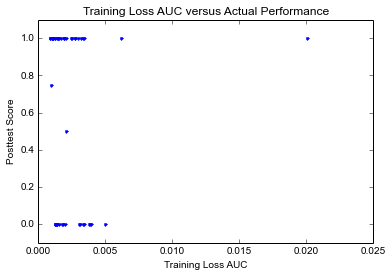

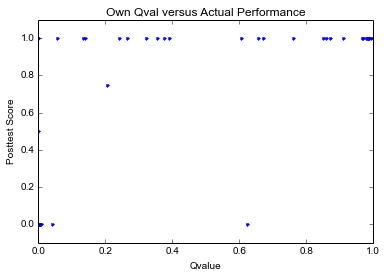

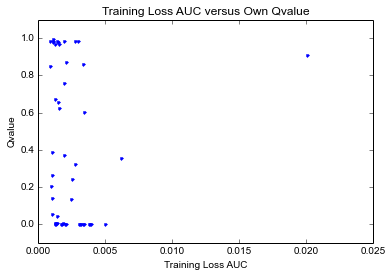

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')


vloss = data11['vloss']
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

# looks like 30/50 are good
# 0-11 top vloss look good, except ix2 is slightly stochastic
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
# 0-17 top qvals are good
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

In [7]:
for i in six.moves.range(num_models):
    ix = sorted_by_vloss[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

 6 | score 1.0 11th | vloss auc 0.00086  0th | selfqval 0.8513 14th
13 | score 1.0  3th | vloss auc 0.00088  1th | selfqval 0.9835  6th
10 | score 0.8 30th | vloss auc 0.00097  2th | selfqval 0.2057 26th
27 | score 1.0 10th | vloss auc 0.00101  3th | selfqval 0.3891 20th
35 | score 1.0 23th | vloss auc 0.00104  4th | selfqval 0.2640 24th
36 | score 1.0 29th | vloss auc 0.00104  5th | selfqval 0.0547 29th
 9 | score 1.0  7th | vloss auc 0.00105  6th | selfqval 0.1403 27th
 2 | score 1.0 25th | vloss auc 0.00108  7th | selfqval 0.9854  3th
16 | score 1.0 24th | vloss auc 0.00109  8th | selfqval 0.9775  8th
43 | score 1.0 22th | vloss auc 0.00110  9th | selfqval 0.9940  0th
17 | score 1.0  2th | vloss auc 0.00124 10th | selfqval 0.6717 16th
44 | score 1.0 21th | vloss auc 0.00125 11th | selfqval 0.9665 10th
15 | score 0.0 35th | vloss auc 0.00127 12th | selfqval 0.0004 38th
40 | score 0.0 47th | vloss auc 0.00128 13th | selfqval 0.0039 33th
26 | score 0.0 42th | vloss auc 0.00133 14th | s

# Training Length 7 Noise 0.01 Learning Rate 0.001

vloss shape (50, 3)
scores shape (50,)
[ 1.     0.125  1.     1.     1.     1.     0.     1.     1.     1.     1.
  0.     0.375  1.     1.     0.     1.     1.     1.     1.     1.     1.
  1.     1.     0.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     0.625  1.     1.     0.375  1.     1.     0.     0.875  1.
  1.     1.     1.     1.     1.     1.   ]


(-0.1, 1.1)

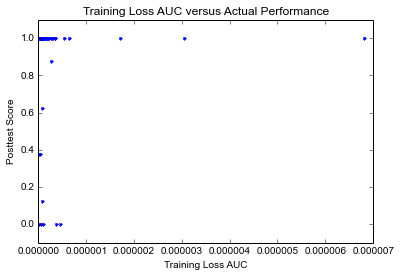

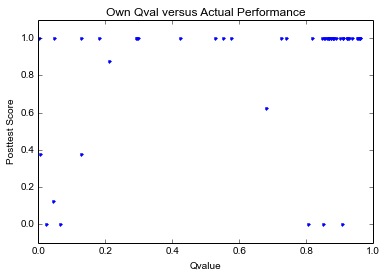

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr001A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr001A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr001A.npz')
#data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/msloss-runlr01A.npz')

vloss = data11['vloss'][:,-3:]
vloss_auc = np.sum(vloss,axis=1)
tloss = data11['tloss'][:,-3:]
tloss_auc = np.sum(tloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]
#msloss = data41['msloss'][:,0,:]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_tloss = np.argsort(tloss_auc)
ranked_by_tloss = ixs2ranks(sorted_by_tloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

#sorted_by_msloss = (np.argsort(msloss[:,0]))
#ranked_by_msloss = ixs2ranks(sorted_by_msloss)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
#six.print_('msloss shape {}'.format(msloss.shape))
six.print_(scores)

num_models = scores.shape[0]

# 40/50 are good models + 1 almost good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.002)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.95,1.0)
ylim(-0.1,1.1)
#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)
#graph_msloss_score(msloss, scores, postfix=None)
#xlim(0,0.00002)
#ylim(-0.1,1.1)
#figure()
#plot(ranked_by_tloss,ranked_by_msloss,'.')


In [6]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    #six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | vloss auc {:.5f} {:2d}th | msloss {:.8f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
    #    ix,scores[ix], ranked_by_score[ix], tloss_auc[ix], ranked_by_tloss[ix], vloss_auc[ix], ranked_by_vloss[ix], msloss[ix,0], ranked_by_msloss[ix], selfqvals[ix], ranked_by_qval[ix]))
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], tloss_auc[ix], ranked_by_tloss[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

46 | score 1.0 26th | vloss auc 0.00004 30th | vloss auc 0.00000 39th | selfqval 0.9603  0th
36 | score 1.0 33th | vloss auc 0.00007 36th | vloss auc 0.00000 46th | selfqval 0.9594  1th
22 | score 1.0  4th | vloss auc 0.00003 21th | vloss auc 0.00000 45th | selfqval 0.9573  2th
32 | score 1.0 38th | vloss auc 0.00007 37th | vloss auc 0.00000  1th | selfqval 0.9558  3th
48 | score 1.0  2th | vloss auc 0.00009 43th | vloss auc 0.00000 17th | selfqval 0.9514  4th
33 | score 1.0 34th | vloss auc 0.00000  0th | vloss auc 0.00000 18th | selfqval 0.9373  5th
 9 | score 1.0 14th | vloss auc 0.00001  9th | vloss auc 0.00000 34th | selfqval 0.9293  6th
16 | score 1.0 10th | vloss auc 0.00001  8th | vloss auc 0.00000 11th | selfqval 0.9258  7th
28 | score 1.0 31th | vloss auc 0.00009 42th | vloss auc 0.00000 42th | selfqval 0.9229  8th
43 | score 1.0 29th | vloss auc 0.00002 11th | vloss auc 0.00000 27th | selfqval 0.9218  9th
23 | score 1.0  3th | vloss auc 0.00013 48th | vloss auc 0.00000 13th 

# Training Length 6 Noise 0.01 Learning Rate 0.001

vloss shape (50, 3)
scores shape (50,)
[ 0.     0.     0.     0.     1.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.125  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.125  0.     0.     0.     0.25   0.     0.
  0.     0.     0.     0.     0.     0.   ]


(-0.1, 1.1)

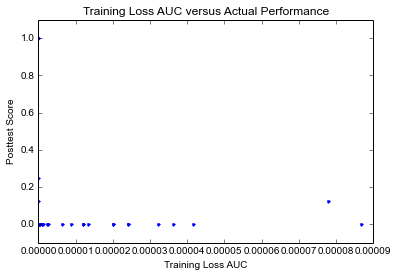

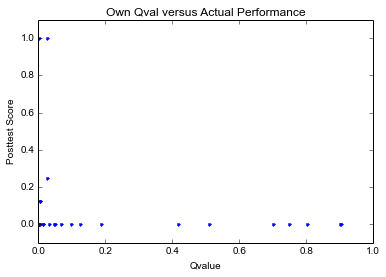

In [8]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr001A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr001A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr001A.npz')
#data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/msloss-runlr01A.npz')

vloss = data11['vloss'][:,-3:]
vloss_auc = np.sum(vloss,axis=1)
tloss = data11['tloss'][:,-3:]
tloss_auc = np.sum(tloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]
#msloss = data41['msloss'][:,0,:]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_tloss = np.argsort(tloss_auc)
ranked_by_tloss = ixs2ranks(sorted_by_tloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

#sorted_by_msloss = (np.argsort(msloss[:,0]))
#ranked_by_msloss = ixs2ranks(sorted_by_msloss)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
#six.print_('msloss shape {}'.format(msloss.shape))
six.print_(scores)

num_models = scores.shape[0]

# 2/50 are good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.002)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.95,1.0)
ylim(-0.1,1.1)
#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)
#graph_msloss_score(msloss, scores, postfix=None)
#xlim(0,0.00002)
#ylim(-0.1,1.1)
#figure()
#plot(ranked_by_tloss,ranked_by_msloss,'.')
